In [1]:
import pandas as pd
import numpy as np
from astropy.time import Time
from time import time
import math
import re


##  Essential Indic Astronomy

### शोधकाः personalities

### प्राचीन works

### अर्वाचीन works

### Modern works

### A learning path

In [202]:
शोधकाः = '''
Maitrāyaņīya Āraṇyaka (Saka -1600)
Śatpatha Brāhmaņa (Saka -2900)
Taittirīya Āraṇyaka (Saka -2800)
Baudhāyana (Saka -600)
Parāśara (Saka -1400)
Garga (Saka -1400)
Lagadha (Saka -900)
Āryabhaţa ( 398)
Varāhamihira (505)
Lalla (About Saka 560)
Mahavira (About Saka 775)
ĀryabhaţaII (About Saka 875).
Bhatotpala (Saka 888)
Śripati (Saka 961)
Rajamrganka Karana (Saka 964).
Karapa Kamala Martanda (Saka 980)
Karana Prakasa (Saka 1014)
Bhasvati Karana (Saka 1021)
Karapottama (Saka 1038).
Mahesvara (Birth date about Saka 1000)
Bhaskaracārya (Birth Saka 1036)
Anantadeva (Saka 1144).
Adityapratap Siddhanta Väviläla Koccanni (Saka 1220).
Grahasiddhi (Saka 1238).
Närmada (About Saka 1300)
Padmanabha (About Saka 1320)
Damodara (Saka 1339)
Makaranda (Saka 1400)
Kesava II (Saka 1418)
Ganesa Daivajnya (Saka 1442)
Lakṣmidasa (Saka 1422)
Janarāja (Saka 1425)
Sürya (Birth Saka 1430)
Ananta (About Saka 1480)
Raghunatha (Saka 1484)
Dinkara (Saka 1500)
Gangadhara (Saka 1508)
Rāmabhaţa (Saka 1512)
Srinatha (Saka 1512)
Visnu (Šaka 1530)
Mallari (About Saka 1524)

Nrsimha (Birth Saka 1508)
Siva (Birth Saka 1510)
Ranganatha (About Saka 1525)
Graha Prabodha (Saká 1541)
Munisvara (Birth Saka 1525)
Divakara (Birth Saka 1528)
Kamaläkara (Saka 1530).
Ranganatha (Saka 1565).
Siddhantarāja by Nityananda (Saka 1561)
Krsna (Saka 1575)
Päääägakautuka by Ratnakantha (Šaka 1580)
Virsika Tantra by Viddana.
Phatteśäha Prakasa by Jaţadhara (Saka 1626)
Dadabhata (Šaka 1641)
Jayasimha (Saka 1650)
Vaisnava Karana by Sankara (Saka 1688)..
Grahaganita Cintamani by Maṇirāma (Šaka 1696)
Brahma Siddhantasära (Šaka 1703)
Yantraraja Ghatana by Mathuranatha (Saka 1704)
Cintamani Diksit (Birth about Saka 1658)
Raghava (Saka 1732)
Tithi Pärijäta by Siva (Saka 1737)
Dinkara
Yajeswara, Alias Bābā Josi-Rode
Nrsimpha, Alias Bipüdova (Birth Saka 1743)
Nilambar Sarmi (Birth Saka 1745)..
Vinayak, Alias Kero Laksman Chhatre (Birth Saka 1745)
Visaji Raghunatha Lele (Birth Saka 1749)
Cintamani Raghunatha Acarya (Birth Saka 1750)
Kṛṣṇa Sastri Godbole (Birth Saka 1753) Living Authors of Astronomical Works
Venkates Bapuji Ketkar (Birth Saka 1775)
Bal Gangadhar Tilak (Birth Saka 1778)
Vinayak Pandurang Khanapurkar (Birth Saka 1780)
Sudhakara Dwivedi (Birth Saka: 1782)
Sangamagrāma Madhavan ( saka 1302)
Vaţaśśēri Paramēśvaran Nampūtiri ( saka 1302)
Kēļalūr Nilakantha Sōmayāji ( saka 1366)
Jyēṣṭhadevan (saka 1500)
Sankara Variyar (saka 1462)
Acyuta Pişăraţi (saka 1472)
'''

import unicodedata

def strip_diacritics(text):
    # Normalize the text to NFD (Normalization Form Decomposition)
    normalized_text = unicodedata.normalize('NFD', text)
    
    # Filter out combining characters (diacritics)
    stripped_text = ''.join(char for char in normalized_text if unicodedata.category(char) != 'Mn')
    
    return stripped_text

# authors = [ authors.split("\n")[i:i+2] for i in range(0, len(authors.split("\n")), 2) ]
# authors = [ [ re.sub(r"\(.*\)", "", x).strip() for x in y ] for y in authors ]

# शोधकाः = pd.DataFrame([ re.match(r"^(\w+.*?)\s*\(\D+(\d+)", x).groups() for x in शोधकाः.split("\n") if len(x.strip()) if "(" in x ], 
शोधकाः = pd.DataFrame([ re.match(r"^(.*?)\s*\(.*?(\-?\d+)", x).groups() for x in शोधकाः.split("\n") if len(x.strip()) if "(" in x ], 
             columns=['person', 'saka']).assign(
                    person = lambda x: x.person.apply(lambda y: re.sub(",.*","",y)),
                    _person = lambda x: x.person.apply(lambda y: strip_diacritics(y)),
                    saka = lambda x: x.saka.astype(int),
                    ce = lambda x: 78 + x.saka,
                    years_ago = lambda x: 2023 -  x.saka + 78
             ).sort_values('saka')

शोधकाः.sort_values(by="saka").style

,person,saka,_person,ce,years_ago
1,Śatpatha Brāhmaņa,-2900,Satpatha Brahmana,-2822,5001
2,Taittirīya Āraṇyaka,-2800,Taittiriya Aranyaka,-2722,4901
0,Maitrāyaņīya Āraṇyaka,-1600,Maitrayaniya Aranyaka,-1522,3701
4,Parāśara,-1400,Parasara,-1322,3501
5,Garga,-1400,Garga,-1322,3501
6,Lagadha,-900,Lagadha,-822,3001
3,Baudhāyana,-600,Baudhayana,-522,2701
7,Āryabhaţa,398,Aryabhata,476,1703
8,Varāhamihira,505,Varahamihira,583,1596
9,Lalla,560,Lalla,638,1541


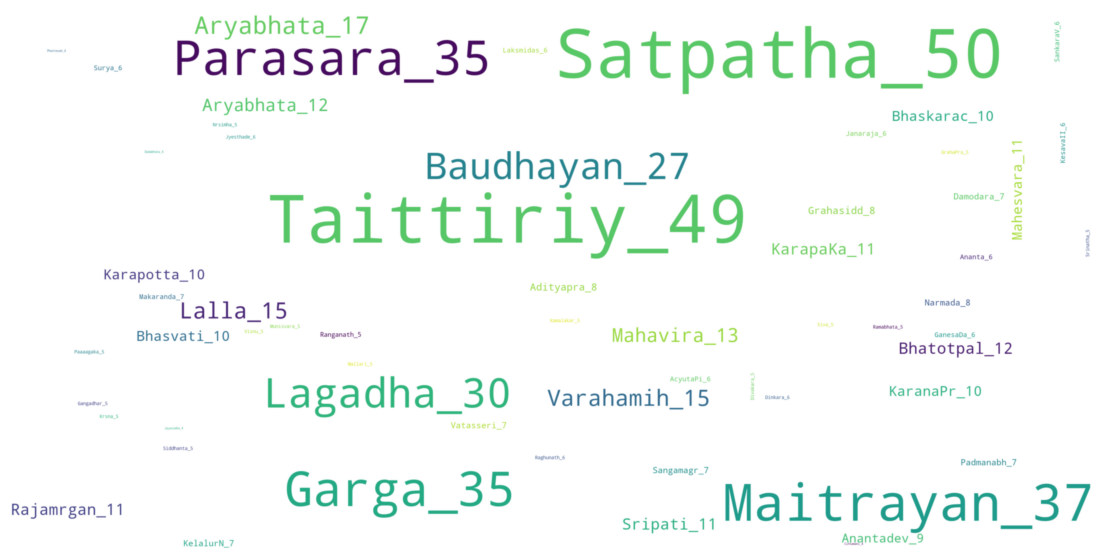

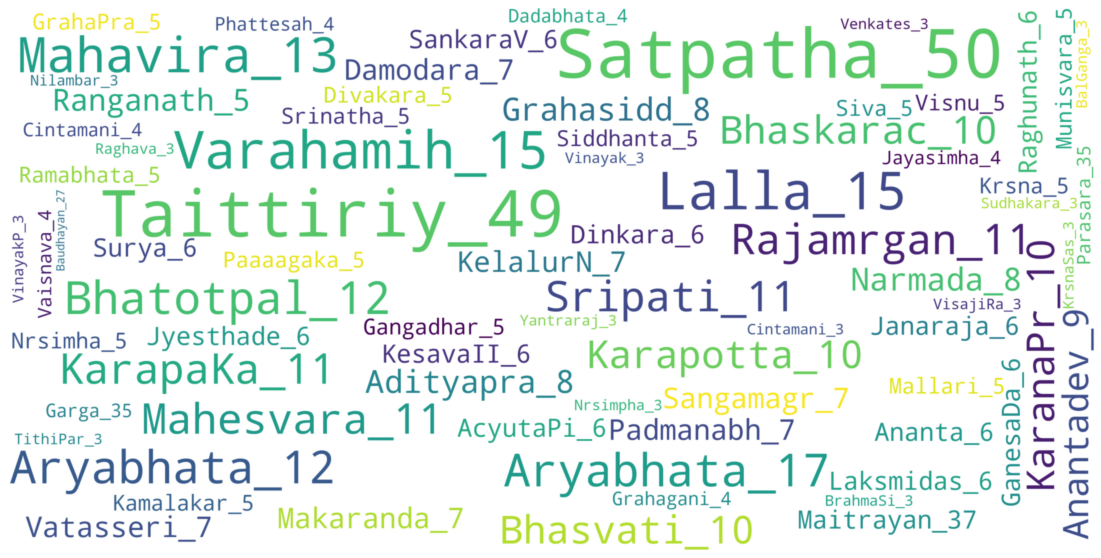

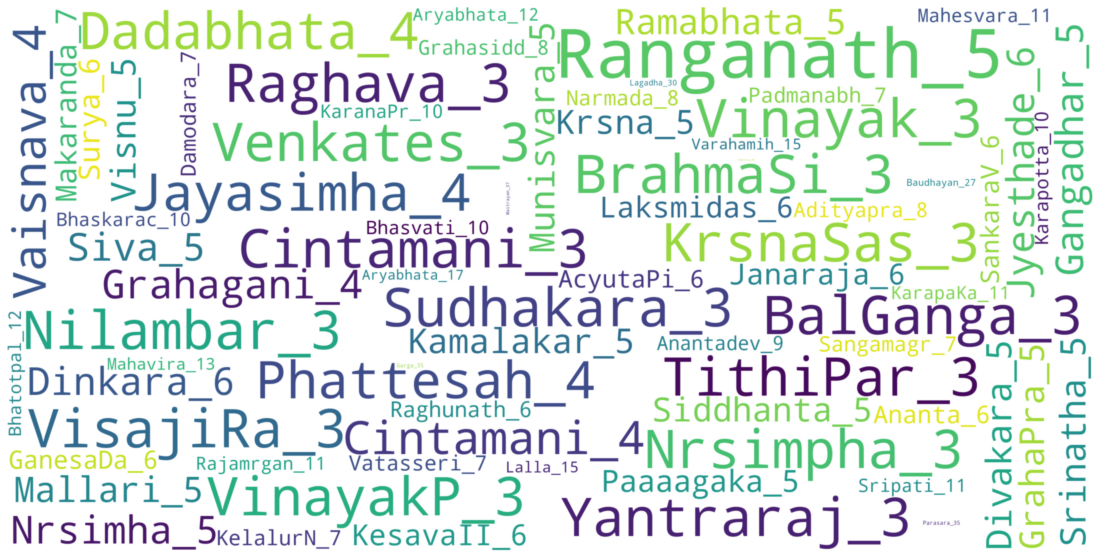

In [204]:
# create a word cloud of the authors
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# wordcloud = WordCloud().generate(authors.name.str.cat(sep=" "), )
# set the size of name based on the years ago

def wc(words):
    words = [ x for y in words for x in y ]
    wordcloud = WordCloud(width=1600*2, height=800*2, max_font_size=200, max_words=100
                          , background_color="white"
                          , include_numbers=False, stopwords=None, random_state=42
                          , collocations=False
                          ).generate(
        # authors.person.str.cat(sep=" "), 
        " ".join(words)
    )

    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='gaussian' )   
    plt.axis("off")
    plt.show()

शोधकाः = शोधकाः.assign( 
    centuries_ago = lambda x: x.years_ago//100,
    persons_ca = lambda x: x._person.apply(lambda y: y[:9]) + "_" + x.centuries_ago.astype(str),
    centuries_since_recent = lambda x: abs(x.years_ago.max() - x.years_ago)//100,
    centuries_since_oldest = lambda x: abs(x.years_ago.min() - x.years_ago)//100,
    centuries_since_mid = lambda x: 15 - (abs(1500 - x.years_ago)//100),
)

# words = शोधकाः[शोधकाः.years_ago >= 0].apply( lambda x: [re.sub(" ", "", (x.person + "_" + str((x.years_ago//100))))+ ""]* (x.years_ago//600), axis=1)
words = शोधकाः[शोधकाः.years_ago >= 0].apply( lambda x: [re.sub(" ", "", x.persons_ca) + ""]* x.centuries_since_oldest**2, axis=1)
wc(words)

words1 = शोधकाः[शोधकाः.years_ago >= 0].apply( lambda x: [re.sub(" ", "", x.persons_ca) + "" ]* x.centuries_since_mid**2, axis=1)
wc(words1)

words2 = शोधकाः[शोधकाः.years_ago >= 0].apply( lambda x: [re.sub(" ", "", x.persons_ca) + "" ]* x.centuries_since_recent**3, axis=1)
wc(words2)


In [207]:
शोधकाः.groupby('centuries_ago').size()

centuries_ago
3     14
4      6
5     16
6     11
7      6
8      3
9      1
10     4
11     4
12     2
13     1
15     2
17     1
27     1
30     1
35     2
37     1
49     1
50     1
dtype: int64

/var/folders/yw/khs2fgqs5d39_5lgfvh8mqlh0000gn/T/ipykernel_99099/1442183187.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(row.person[3][:9], (i, row.person.len - patches.get(i,0)), rotation=0, color = color, fontsize=10 + (2 if i in very_famous else 0))


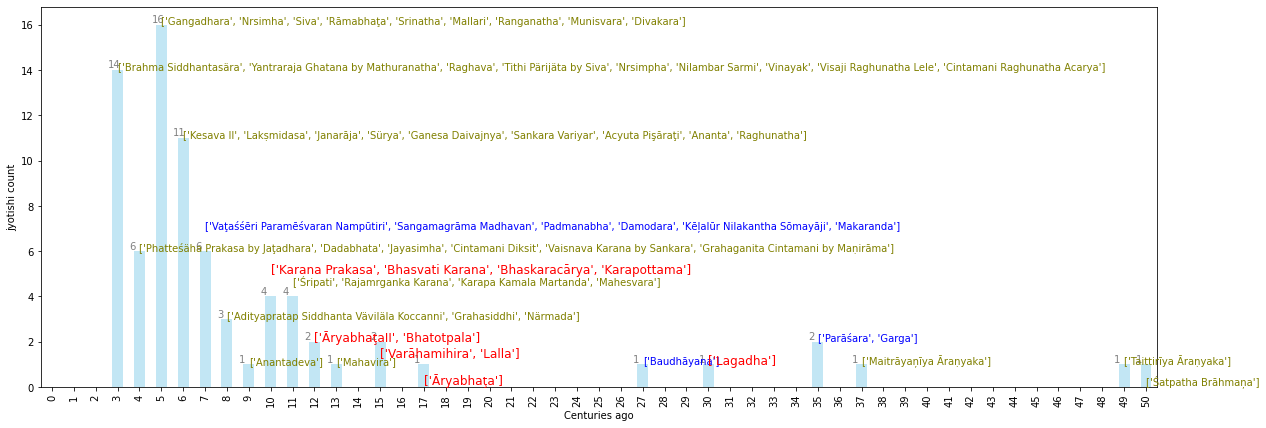

In [211]:
# Plot the number of authors per century , include every century from 0 to 35, 
ax = शोधकाः.groupby('centuries_ago').size().reindex(range(0,51), fill_value=0).plot(kind='bar', figsize=(20,7), color="skyblue", alpha=0.5)
# ax = शोधकाः.groupby('centuries_ago').size().plot(kind='bar', figsize=(20,5))
ax.set_ylabel("jyotishi count")
ax.set_xlabel("Centuries ago")

# annonate the bar tip with the number of authors if the number is greater than 0
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f"{p.get_height()}", (p.get_x() - .2 , p.get_height() + .1), color="gray")

# For each century, annotate the initial and final author
for i, row in शोधकाः.groupby('centuries_ago').agg({"person": ["first", "last", len , list]}).iterrows():
    # print(i, row.person[0], row.person[1], row)
    # color blue for odd centuries and red for even centuries
    color = "blue" if i % 2 else "red"
    famous = [27, 30, 35, 17, 15, 12, 7]
    very_famous = [12, 15, 17, 30, 10]
    color = "blue" if i in famous else "olive"
    color = "red" if i in very_famous else color
    patches = { 10: -1, 11 : -.5 , 7: -1, 15 : .7, 17: .9, 50:.9}
    ax.annotate(row.person[3][:9], (i, row.person.len - patches.get(i,0)), rotation=0, color = color, fontsize=10 + (2 if i in very_famous else 0))
    # if row.person[0] != row.person[1]:
    #     ax.annotate(row.person[1][:9], (i, row.person.len+1), rotation=30, color = color)
    
# शोधकाः.groupby('centuries_ago').size().plot(kind='bar', figsize=(10,5))

### Important Works - Word Soup

### Vedic/Puranic
      * Taittiriya Samhita
      * Shatapatha Brahmana
      * Maitrayaniya Upanishad
      * Kaushitaki Upanishad 
      * Brahmanda Purana
      * more ...
  
### Vedangic
      * Parāśara Tantra
      * Vṛddhagārgīya Jyotiṣa
      * Lagadha Vedānga Jyotiṣa, Lagadha
      * more ...

### Siddhāntic
      * Bṛhat Samhita
      * Aryabhatiya, Aryabhata
      * Panca Siddhānta, Varahamihira
      * Siddhānta Shiromani, Bhaskara
      * Surya Siddhānta
      * more ...
  
### How to collect, organize and navigate through these works?


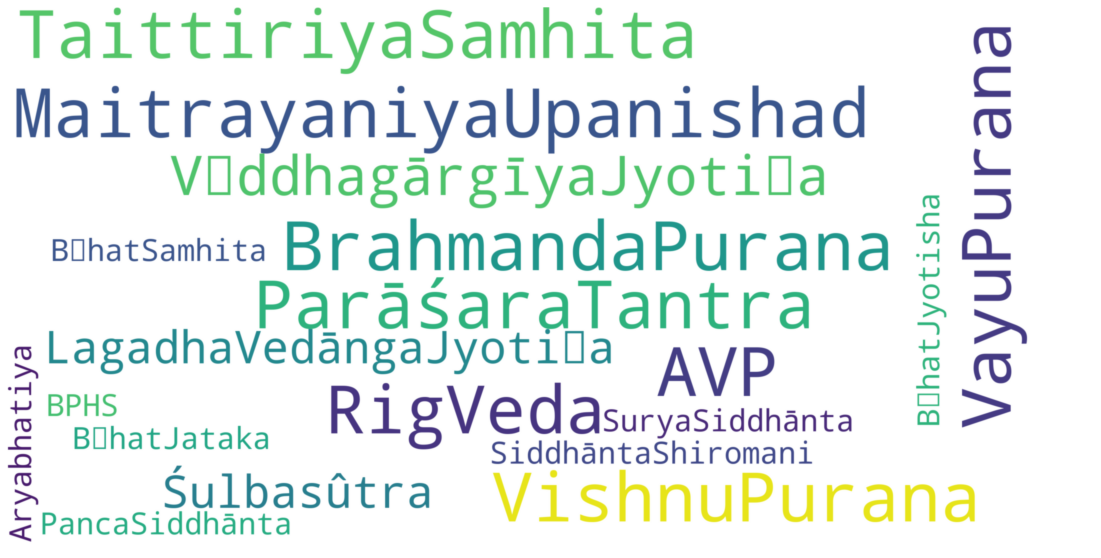

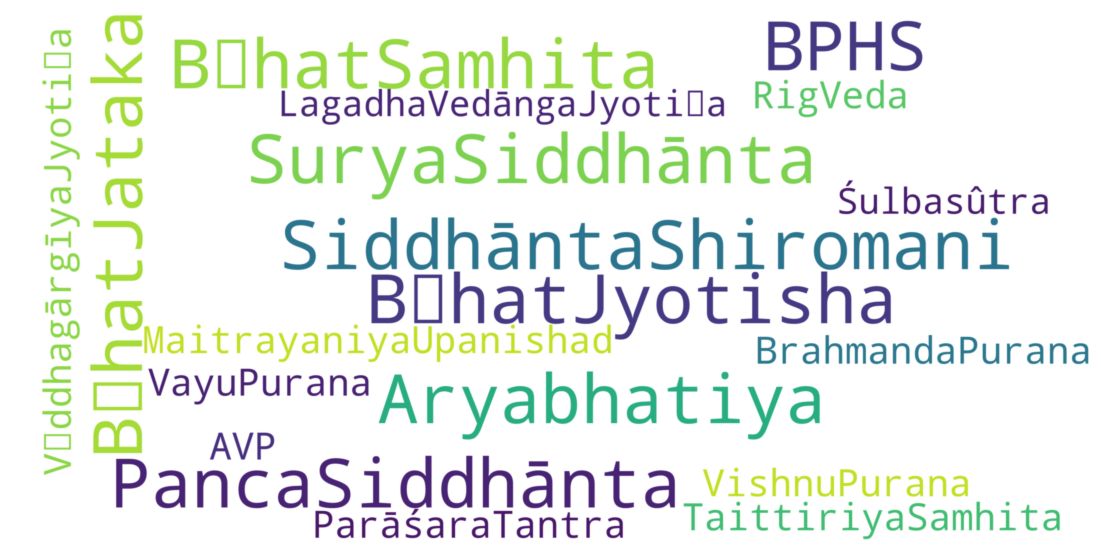

In [304]:
ws1 =[ 
    'Maitrayaniya Upanishad', 'AVP', 'BrahmandaPurana',  'Vishnu Purana', 'Vayu Purana',
    'Taittiriya Samhita', 'RigVeda' , 'Parāśara Tantra' , 'Vṛddhagārgīya Jyotiṣa' , 'Lagadha Vedānga Jyotiṣa', 'Śulbasûtra'  ] 
ws2 = [ 'Aryabhatiya', 'BPHS' , 'Surya Siddhānta' ,  'Panca Siddhānta' , 'Siddhānta Shiromani', 
       'Bṛhat Jyotisha', 'Bṛhat Samhita' ,  'Bṛhat Jataka' ]
ws1 = [ x.replace(" ", "") for x in ws1 ]
ws2 = [ x.replace(" ", "") for x in ws2 ]

wc([[x]*3 for x in ws1 ] + [[x] for x in ws2])
wc([[x] for x in ws1 ] + [[x]*3 for x in ws2])

## Key works on pre-siddhantic Indian astronomy and mathematics in modern times

In [363]:
papers = '''
1. 1886 Naks, Burgess, E., On the origin of the lunar division of the zodiac, represented by the Nakṣatra system of the Hindus, J. Am. Or. Soc. 8 1886
1. 1887 LVJ, Thibaut, G., Contributions to the explanation of the Jyotiṣa Vedānga', J As. Soc. of Bengal, Calcutta, 47 (1887) Pt. i, 411-37.
1. 1889 Siddanta, Thibaut, G. (1889)-The Pañca Siddhantika-the Astrono-mical works of Varahamihira, edited by G. Thibaut & Mm. Sudhakara Dvivedi, Banaras.
1. 1889 Time, Weber, A., 'On the Enumeration of the Four Measures of Time at Garga', Indian Studies, 9, (1889)
1. 1896 Jyotisa, Dikshit, S. B. (1969, 1981). Bharatiya Jyotish Sastra (in Marathi) Poona (1896), Vol. 1. (English trans:. Vaidya, R.V.). Government of India Press.
1. 1896 Siddanta, Dikshit, S. B. (1969, 1981). Bharatiya Jyotish Sastra (in Marathi) Poona (1896), Vol. 2. (English trans:. Vaidya, R.V.). Government of India Press.
1. 1908 LVJ, Dwivedi, S. (1908). Yājuṣa Jyotiṣa edited with the Commentary of Somākara Śeṣa (Sanskrit), Medical Hall Press, Benares.
1. 1925 LVJ, Tilak, B. G., Section on 'Note on the interpretation of the Vedanga Jyotisha (Criticism and suggestions)', included in a collection of his writings entitled Vedic chronology and Vedanga Jyotisha, Poona City, 1925
1. 1934 LVJ, Kulkarni, B. R., 'The Lagna system of the Vedōnga Jyotiṣa', Dhulia, 1934. 
1. 1935 LVJ, Shamasastry, R., "The Parva-rasi or full and new moon of the Vedānga Jyotisa', Proc. of the All-India Or. Conf., (Mysore, 1935), 692-97.
1. 1935 LVJ, Shamasastry, R., 'Light on the Vedänga Jyotisa', Prof. S. Kuppuswami Sastri Com. Vol., Madras, 1935.
1. 1936 LVJ, Shamasastry, R.(1936) Vedangajyoutisha, Text, Translation and Commentary. Mysore.
1. 1937 Jyotisa, Sengupta, P.C. Astronomy in Ancient India, The Cultural Heritage of India, first Published by Ramakrishna Mission, 1937, reprinted in Vol.VI (1986):56-82.
1. 1938 Eclipse, Shamasastry, R. (1938) Drapsa. the Vedic Cycle of Eclipses. Mysore.
1. 1946 LVJ, Prasad, Gorakh, "The astronomy of the Vedānga Jyotiṣa', J. Ganganatha Jha Res. Inst. 4, (1946-47) 239-48.
1. 1947 Jyotisa, Sengupta, P.C. (1947) Ancient Indian Chronology, Univ. of Calcutta, Calcutta.
1. 1951 Purana, Mankad, D. R. (1951). Puranik chronology. Gangajala Prakashan.
1. 1955 Calendar, Saha, M. N., & Lahiri. (1955). Report of the calendar reform commit-tee. Council for Scientific and Industrial Research.
1. 1968 LVJ, Apurba Kumar, The working principle of the Vedanga Jyotisha calendar', Indian Studies Past and Present, (Calcutta), 10.i (Oct.-Dec., 1968)
1. 1971 Science, Pingree, D. (1971). Census of the exact sciences in Sanskrit (Vol. 1–4).  American Philosophical Society.
1. 1976 Jyotisa, Roy, S.B. (1976) Prehistoric Astronomy. Inst. of Chronology; N.Delhi
1. 1977 Jaina, J C Sikdar, Eclipses of the Sun and Moon according to Jaina[3][4] astronomy, in Proceedings of the Symposium on the 1500th Birth Anniversary of Aryabhata I, New Delhi[2][10], 1976, Indian J. Hist. Sci. 12 (2) (1977
1. 1978 Jyotisa, Pingree, D (1978) "Indian Astronomy", Proc. Am. Phil. Soc., 122,6, pp.361-364..
1. 1979 Jaina, S S Lishk, and S D Sharma, Zodiacal circumference as graduated in Jaina[3][4] astronomy, Indian J. Hist. Sci. 14 (1) (1979)
1. 1979 Jaina, S D Sharma, and S S Lishk, Length of the day in Jaina[3][4] astronomy, Centaurus 22 (3) (1978/79),
1. 1984 LVJ, Sastry, T. S. K. (1984). Vedāṅga Jyotiṣa of Lagadha. Indian Journal of History of Science, 19(4), l–74.
1. 1984 LVJ, Sastry, T.S.K (1984) (Ed.) VediingaJyouti~a ofLagadha, IJHS, 19.4. Supplement, ppl-74.
1. 1986 Purana, Mitchiner, J. E. (1986). Yuga Purāṇa. The Asiatic Society.
1. 1989 LVJ, Holay, P.v., (1989) VedicAstronomy, B.Apte Smarak Samiti. Nagpur.
1. 1989 Naks, Pingree, D., and Morrissey, P., On the Identification of the Yogata–ra–s of the Indian Naks.atras, Journal of History of Astronomy, xx. (1989)
1. 1989 Jaina, Kanhaiyalal, Surya-prajiiapti-Candraprajnapti(1989) (Ed.) ,JinagamaGranthamala,29 Beawar.
1. 1991 Naks, Abhyankar, K. D. (1991). Misidentification of some Indian nakṣatras.  Indian Journal of History of Science, 26(1), 1–10.
1. 1993 Calendar,Abhyankar, K.D. (1993), "A Search for the Earliest Vedic Calendar, lJHS, 28.1, pp.I-14.
1. 1993 Jyotisa, Ohasi, Yukio. Development of Astronomical Observation in Vedic and Post-Vedic India, IJHS, 28.3(1993)185- 251
1. 1998 Calendar, Abhyankar, K.D. Antiquity of the Vedic Calendar, BAS, 26 (1998):61-66.
1. 2000 Naks, Gondhalekar, Prabhakar, THE VEDIC NAKSATRAS - A Reapprisal
1. 2000 Jyotisa, Sen, S. N., & Shukla, K. S. (Eds.). (2000). History of astronomy in India (2nd ed.). Indian National Science Academy.
1. 2000 Months, Narahari, A. (2000). The Chaitradi Scheme. Indian Journal of History of Science, 35(1), 1–12.
1. 2002 Jyotisa, Abhyankar, K.D. (2002), Pre-siddhiintic Indian Astronomy, ISERVE, Hyderabad.
1. 2002 LVJ, Abhyankar, K.D. On two Important Provisions in Vedāga Jyotia, IJHS, 37.3 (2002):213-22.
1. 2003 Naks, Narahari, Achar, “In search of Nakshatras in RgVeda”,  in Contemporary Views of Indian Civilization, Bhu Dev Sharma (Ed) World Association for Vedic Studies, New York (2003)
1. 2004 LVJ, Abhyankar, K.D. 5-year yuga in Vedāga Jyotia, IJHS, 39.2(2004):227-230.
1. 2005 N3339, Iyengar, R.N., (2005) "Eclipse period number 3339 in the Rgveda ", lJHS,40.2, 139-152.
1. 2006,Abhyankar, (2006) Dhruvaka-vikshepa system of Astronomical Coordinates, IJHS 41.2, 151-157.
1. 2006 Naks, Vahia, Bhujle Possible period of the design of Nakshatras and Abhijit
1. 2008 Calendar, Gondhalekar, Prabhakar, Intercalation in Vedic Texts, IJHS, 43.4 (2008b) 495-514
1. 2008 LVJ, Gondhalekar, Prabhakar, Vedāga Jyotia-Where and When?, IJHS, 43.3(2008a):339-52.
1. 2009 LVJ, Iyengar, R. N. ACONNECTIONS BETWEEN THE VEDANGA JYOTISA AND OTHER VEDIC LITERATURE , IJHS 2009
1. 2010 Months, Gondhalekar, Prabhakar, THE VEDIC NAKSATRA-NAMES OF THE MONTHS IJHS
1. 2011 Dhruva, Iyengar, R. N. (2011). DHRUVA THE ANCIENT INDIAN POLE STAR: FIXITY, ROTATION AND MOVEMENT. Indian Journal of History of Science
1. 2013 Time, Gondhalekhar, P. (2013). The time keepers of the Vedas. Manohar.  [ISBN 978-81-7304-969-9].
1. 2013 PT, Iyengar, R. N. (Ed.). Parāśaratantra: Reconstructed Text on Astronomy and Natural Sciences, Jain Uni- versity Press, Bangalore, 2013.
1. 2013 PT, Iyengar, R. N. (2013). Parāśara Tantra (Ed. trans & Notes). Jain Uni- versity Press. [ISBN 978-81-9209-924-8].
1. 2014 Solar, Iyengar, R. N. (2014). Parāśara’s six season solar zodiac and heliacal visibility of star Agastya in 1350–1130 BCE. Indian Journal of History of Science, 49(3), 223–238.
1. 2015 Harappa, A K Bag, Early System of Naks. atras, Calendar and Antiquity of Vedic & Harappan Traditions 
1. 2017 VGJ, Geslani, M., Mak, B., Yano, M., & Zysk, K. G. (2017). Garga and early astral science in India. History of Science in South Asia, 5(1), 151–191.
1. 2017 Time, Hayashi T., The units of time in ancient and medieval India, History of Science in South Asia, 5.1 (2017): 1- 116.
1. 2018 Naks, Shylaja B. S., Pai V. R., 2018a, Observational records of stars in Indian astronomical texts, Curr. Sci.,
1. 2019 VGJ, Iyengar, R. N., Sudarshan, H. S., & Viswanathan, A. (2019).  Vṛddhagārgīya Jyotiṣa (Part1). Tattvadīpaḥ, Journal of Academy of Sanskrit Research, Melkote, 25(1), 60–81.
1. 2019 VGJ, Mak, B. (2019). Vedic astral lore and planetary science in the Gārgīyajyotiṣa. History of Science in South Asia, 7, 52–71.
1. 2021 Solar, Iyengar, R. N., Sunder Chakravarty Transit of sun through the seasonal nakṣatra cycle in the Vrddha‑Gārgīya Jyotiṣa IJHS
'''.split("\n")
1


1

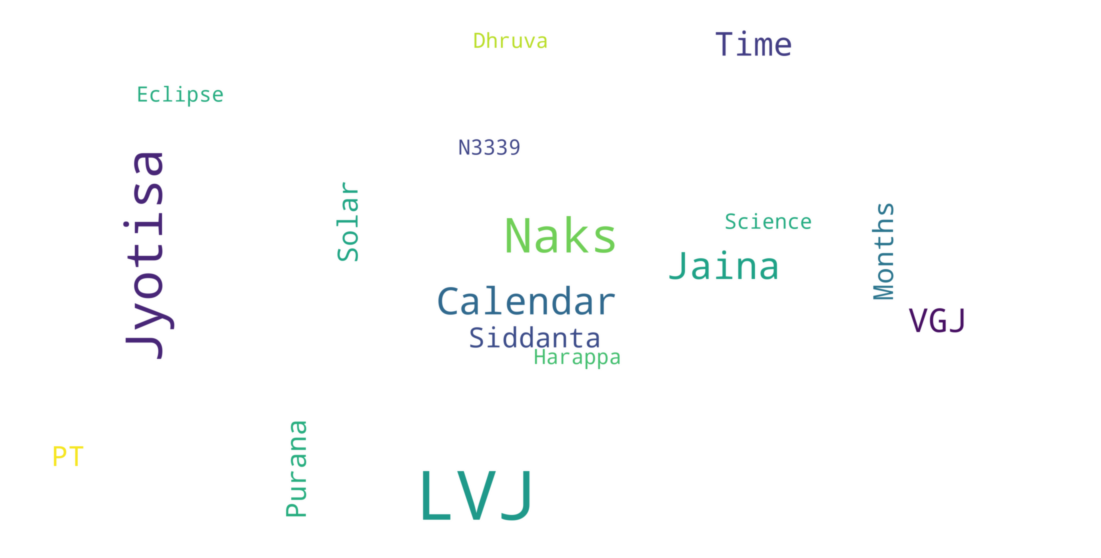

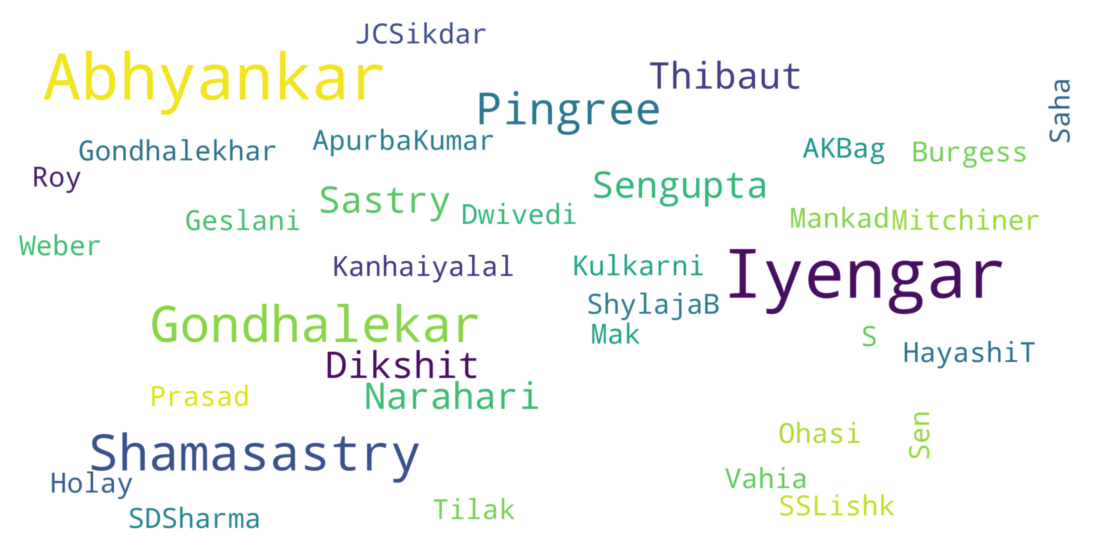

In [364]:

wc_paper_theme = [ [re.match(r"^.*?(\w+)\s*,.*", x).groups()[0]] for x in papers if x.strip() != '']
wc(wc_paper_theme)

# wc_paper_authors = [ [re.match(r"^.*?\s*(\w+)\s*,\s*(\w+)\s*,.*", x).groups()[1]] for x in papers if x.strip() != '']
# wc(wc_paper_authors)
def grab(x):
    m = re.match(r"^.*?,\s*(.*?)\s*,.*", x)
    if m:
        ans = m.groups()[0]
        # if ('S' in ans) : print (ans ,x)
        return ans.replace(' ', '')
    else:
        raise Exception(x)

wc_paper_authors = [ [grab(x) ] for x in papers if x.strip() != '' ]
wc(wc_paper_authors)

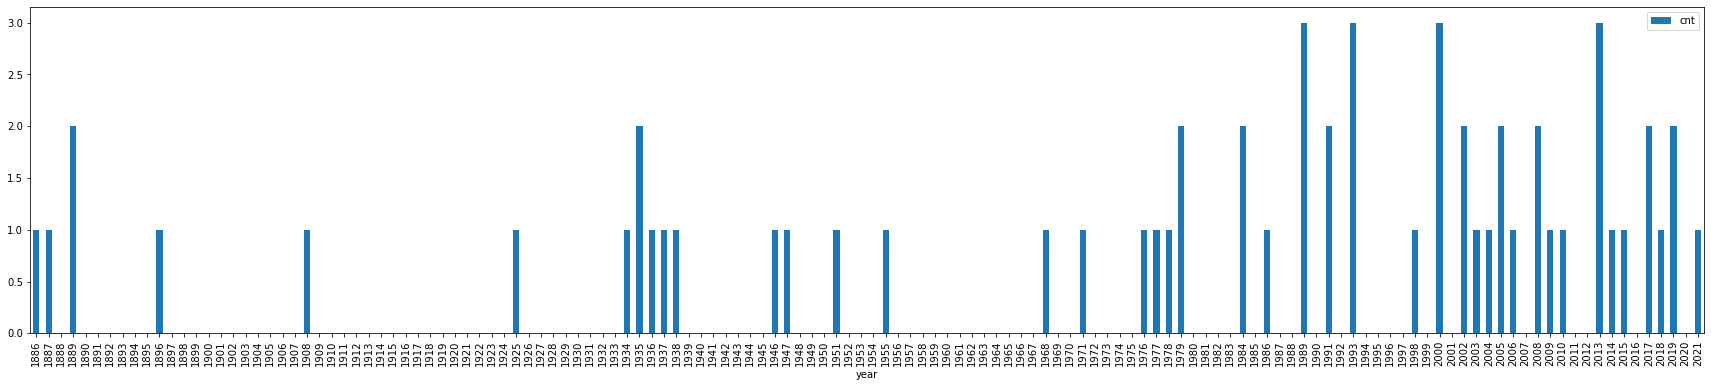

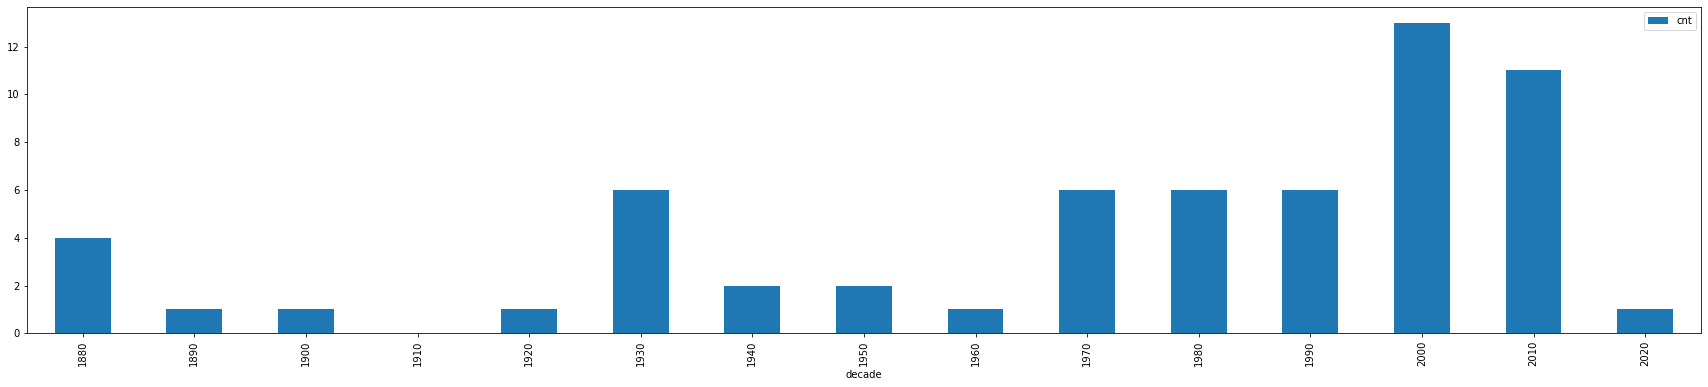

In [321]:

wc_paper_years = pd.Series([ '' + re.match(r"^.*?(\d{4}).*", x).groups()[0] for x in papers if x.strip() != ''])
wcx = pd.DataFrame(wc_paper_years.value_counts().sort_index())
#.plot.bar(figsize=(20,10)a

def gx(x):
    try:
        return wcx.loc[f'{x}'].values[0]
    except:
        return 0

pd.DataFrame([ (1*(y//1), gx(y)) for y in range(1886,2022) ], columns=['year', 'cnt']).groupby("year").sum().plot.bar(figsize=(30,6));
pd.DataFrame([ (10*(y//10), gx(y)) for y in range(1886,2022) ], columns=['decade', 'cnt']).groupby("decade").sum().plot.bar(figsize=(30,6));

## Themes of Modern works

- Vedic Information - Nakshatras, 3339,  ayanas , seasons - SB Dixit, RNI, Bag, Tilak, Gondhalekar, Abhyankar
- Nakshatras - their origin, their ambiguity, solar and lunar relation, visible stars vs zones, equalness and unequalness
- Month Names - their origin, their ambiguity - Gondhalekar, Narahari
- Solar Seasons - their nakshaatra and drift - RNI
- Eclipse - relation to 3339 and saros - RNI
- Calendar - largely VGJ, but also other works including origin of Chaitraadi - Sastry, Kuppu, RNI, Narahari, Gondhalekar, Abhyankar
- Siddhantic works - very little on their relation to pre-siddhantic works - Thibaut, perhaps more..
- PT, VGJ - Largely RNI , + Mak
- Harappa - RNI, Bag
- Jaina - Largely Lishk and Sharma

## Gaps in attention - opportunities for research
- Grahas - Not much work on them, except for RNI references in VGJ
- Very heavy focus on LVJ - to the exclusion of information in Vedic text
- Barring Dixit - very little focus on Yantra constructions
  

## Structure of a learning path
- Intro to Taxonomy of works
- Intro to Authors and Thinkers
- Evolution of Indian Astronomy - from observation to algorithmic to model based
- Importance of Nakshatras and their ambiguity - daivata, count, veethi, marga, etc
- Different units of observable time - ahoratra, seasons, paksha, months, ayanas, years, etc
- Core concepts of modern astronomy - seasons, months, eclipses, calendar, co-ordinates, transformation, time, geo-location, obliquity, etc
- Algorithms in LVJ with exercises
- Methods of accessing and processing granthas, documents, papers, books
- Evidence based thinking - to avoid circular reasoning or confirmation bias
- Relevance of this knowledge in modern times
  



```

```